# Tracking the Evolution of Irregular Satellites

Here, we initialize some randomly-distributed satellites around a planet, filling its Hill sphere, and study which ones remain stable over long timescales.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(50)

# details about star and planet
m_star = 1
m_planet = 1e-3
a_planet = 5.2
e_planet = 0.05

# defining the Hill radius
r_Hill = a_planet*(1 - e_planet) * (m_planet / (3*m_star))**(1/3)

For easy initialization (using orbital elements) we'll initialize the satellites with the planet as their main body.  For easier viewing, we treat the planet as the 'primary' particle of the entire simulation, and let the star orbit around *it*. We give the satellites a range of possible semimajor axes and inclinations, but keep them all circular.

In [12]:
# details about satellites
num_sats = 100

a_sats = np.random.uniform(.1*r_Hill, r_Hill, num_sats)    # a ranges from .1*r_Hill to r_Hill (au)
i_sats = np.random.uniform(0, np.pi, num_sats)             # i ranges from 0 to pi (radians) 
om_sats = np.random.uniform(0, 2*np.pi, num_sats)          # omega ranges from 0 to 2 pi (radians)

In [13]:
sim = rebound.Simulation()

# add planet
sim.add(m=m_planet, hash='planet')

# add satellites around planet
for i in range(num_sats):
    sim.add(m=0, a=a_sats[i], inc=i_sats[i], omega=om_sats[i], primary='planet')
    # note that we set m = 0 -- these will be test particles, so they won't interact with each other
    
# add star "orbiting" planet
sim.add(m=m_star, a=a_planet, e=e_planet, hash='star')

We now have our setup! We can visualize the irregular satellites in three dimensions by zooming in on the planet in $\texttt{OrbitPlotSet}$.

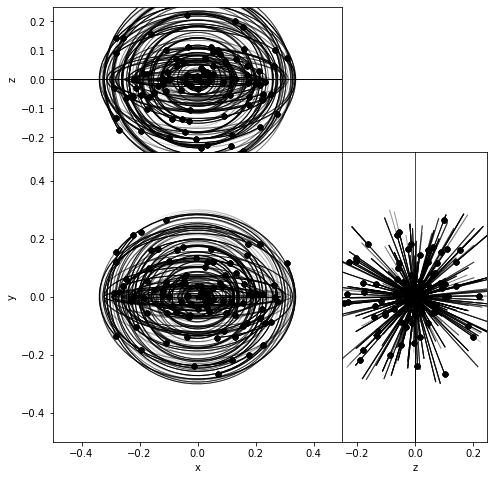

In [14]:
fig = rebound.OrbitPlotSet(sim, xlim=[-.5,.5], ylim=[-.5,.5], figsize=(8,8))

Next steps:
- Integrate over some amount of time
- See which satellites leave the Hill sphere
- Make some pretty plots
- Maybe add in a sudden change in stellar mass?